# Ciencia de Datos 2022

# <center> **Aula 20 -- Visualización**

In [2]:
import numpy as np
import pandas as pd      # trabajar con Dataframes

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly
#import bokeh

# en R: library(ggplot2)

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

Vamos a trabajar con el dataset *Iris*.

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [5]:
#data = sns.load_dataset('tips')
data = sns.load_dataset('iris')

In [10]:
data.tail(15)

,sepal_length,sepal_width,petal_length,petal_width,species
135,7.7,3.0,6.1,2.3,virginica
136,6.3,3.4,5.6,2.4,virginica
137,6.4,3.1,5.5,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica
139,6.9,3.1,5.4,2.1,virginica
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica


In [11]:
data.shape

(150, 5)

In [12]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [13]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Pandas *built in* Graphics

<AxesSubplot:>

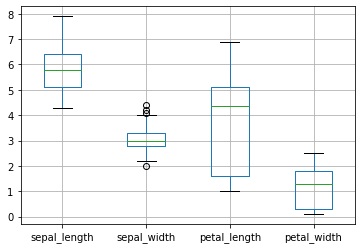

In [17]:
data.boxplot()

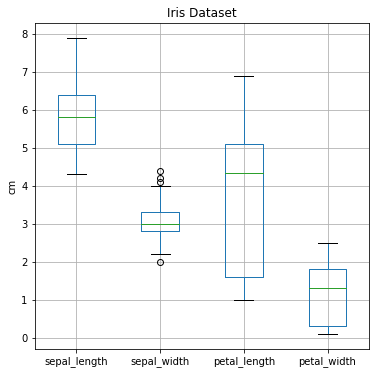

In [21]:
fig = plt.figure(figsize=(6,6))
data.boxplot()
plt.title('Iris Dataset')
plt.ylabel('cm')
plt.show()

In [22]:
# guardar una gráfica de matplotlib en disco
#fig.savefig('boxplot.pdf', bbox_inches='tight', dpi=1200)
fig.savefig('boxplot.pdf', bbox_inches='tight', dpi=100)
#fig.savefig('boxplot.pdf')

<Figure size 432x432 with 0 Axes>

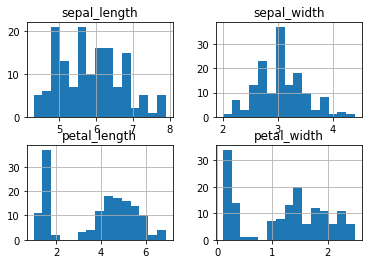

In [23]:
fig = plt.figure(figsize=(6,6))     # crear ambiente de graficación
data.hist(bins=15)
plt.show()

kind
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'scatter' : scatter plot
 |      - 'hexbin' : hexbin plot.

<AxesSubplot:ylabel='Frequency'>

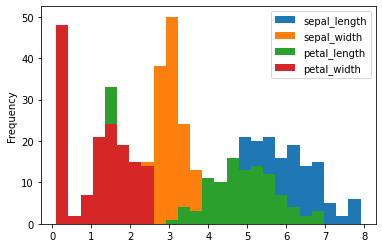

In [24]:
data.plot.hist(stacked=False, bins=25)

<Figure size 432x432 with 0 Axes>

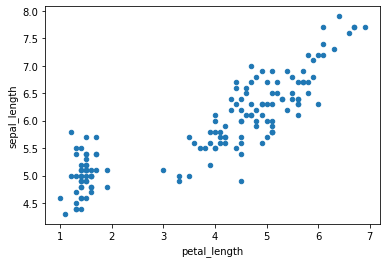

In [26]:
fig = plt.figure(figsize=(6,6))
data.plot.scatter(x='petal_length', y='sepal_length')
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

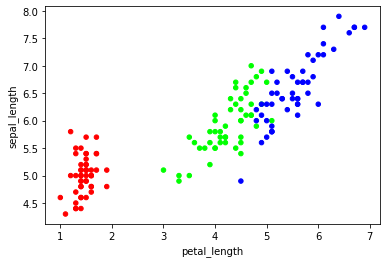

In [30]:
data.plot.scatter(x='petal_length', y='sepal_length', color=pd.get_dummies(data['species']).values)

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

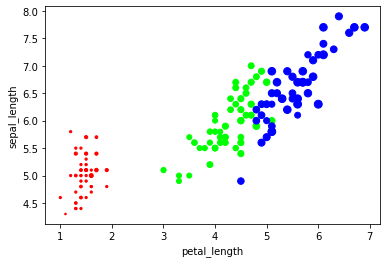

In [32]:
data.plot.scatter(x='petal_length', y='sepal_length', s=25*data['petal_width'], 
                  color=pd.get_dummies(data['species']).values)

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

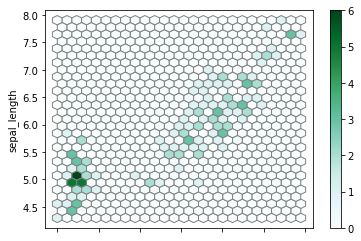

In [35]:
data.plot.hexbin(x='petal_length', y='sepal_length', gridsize=25, color='gray')

<Figure size 432x288 with 0 Axes>

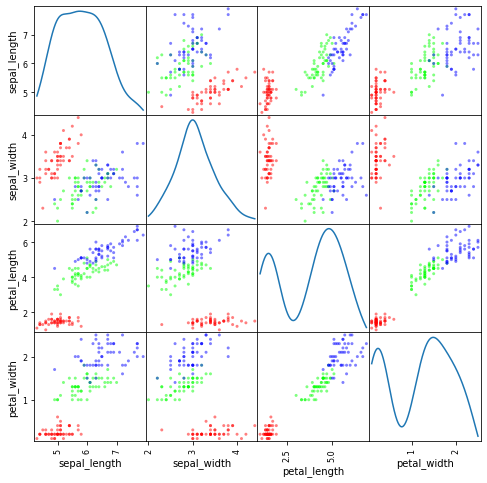

In [36]:
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(data, diagonal='kde', color=pd.get_dummies(data['species']).values, figsize=(8,8))
plt.show()

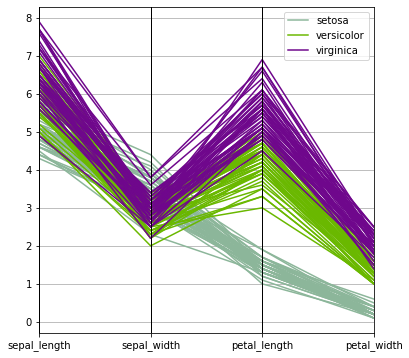

In [40]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(6,6))
parallel_coordinates(data, class_column='species')
plt.show()

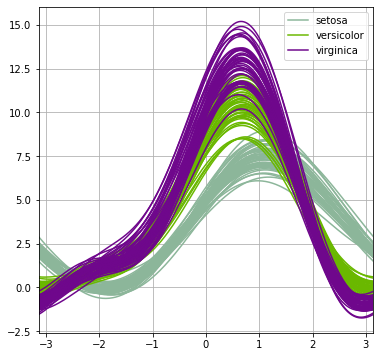

In [41]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(6,6))
andrews_curves(data, class_column='species')
plt.show()

In [43]:
# no funciona
#data.plot.pie(subplots=True, figsize=(6,6))

# Seaborn

In [44]:
tips = sns.load_dataset('tips')

In [45]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
tips.shape

(244, 7)

In [47]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [48]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [49]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
tips.isnull().sum()

In [ ]:
# gráficos en Seaborn

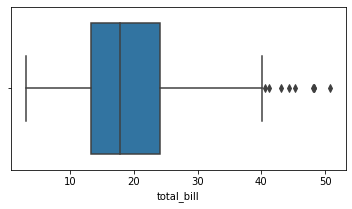

In [50]:
fig = plt.figure(figsize=(6,3))
sns.boxplot(x=tips['total_bill'])
plt.show()

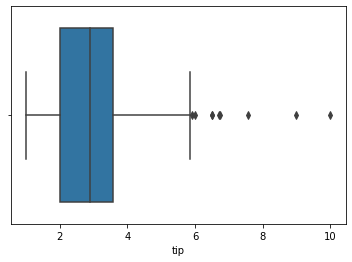

In [51]:
ax = sns.boxplot(x=tips['tip'])

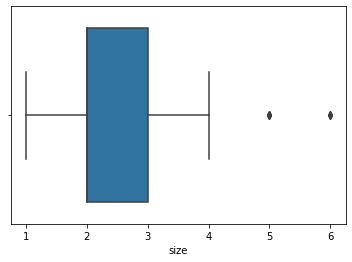

In [52]:
ax = sns.boxplot(x=tips['size'])

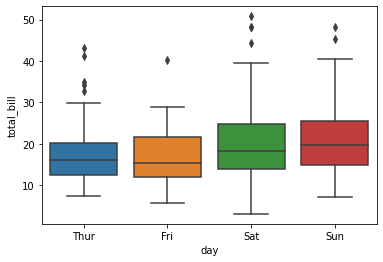

In [53]:
ax = sns.boxplot(data=tips, x='day', y='total_bill')

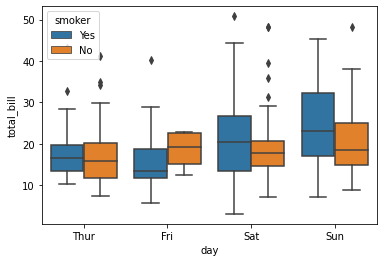

In [56]:
ax = sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker')

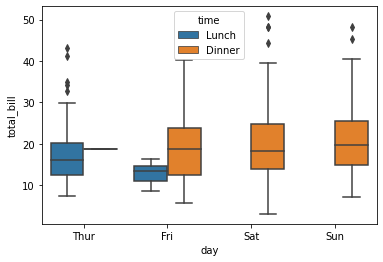

In [57]:
ax = sns.boxplot(data=tips, x='day', y='total_bill', hue='time')

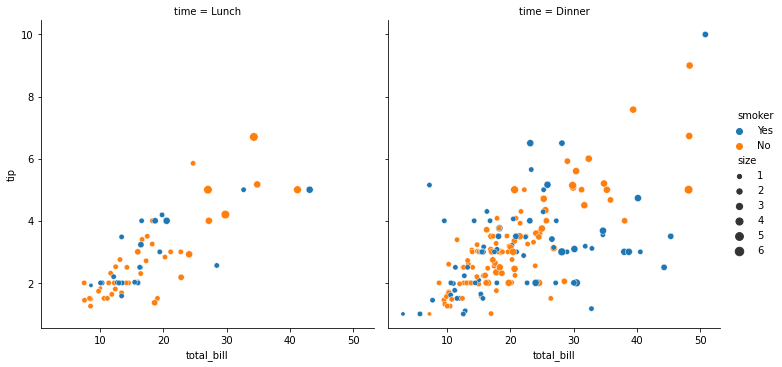

In [58]:
# Create a visualization
ax = sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", size="size")
#ax = sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size")

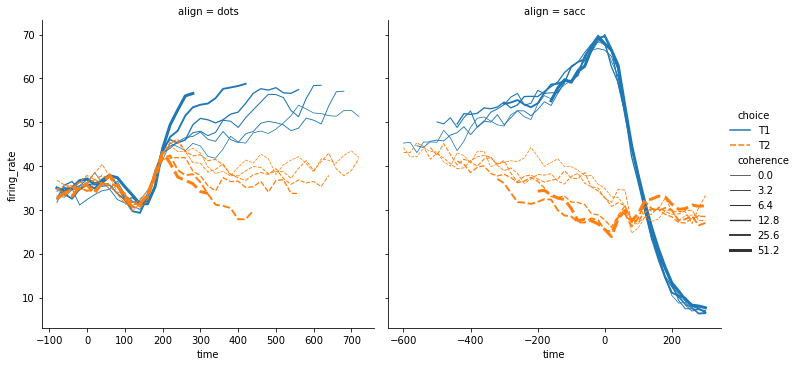

In [59]:
dots = sns.load_dataset("dots")

ax = sns.relplot(data=dots, kind="line", x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice", facet_kws=dict(sharex=False))

In [60]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


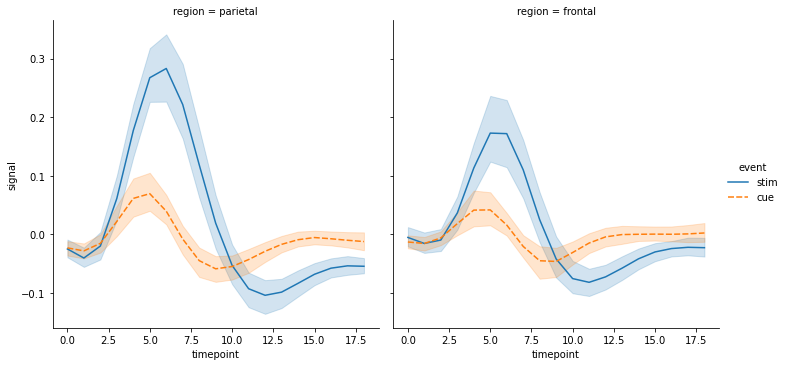

In [61]:
fmri = sns.load_dataset("fmri")

ax = sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", col="region", hue="event", style="event")

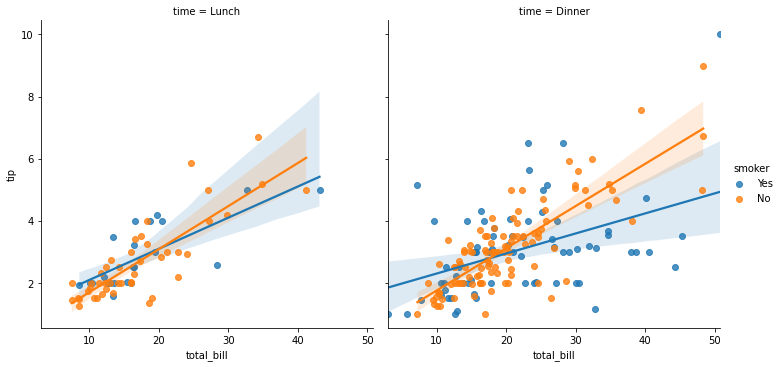

In [62]:
ax = sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

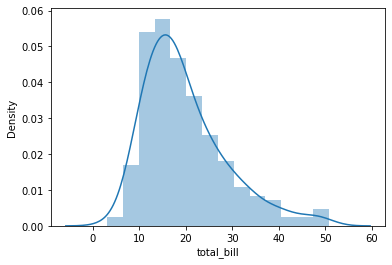

In [63]:
ax = sns.distplot(tips["total_bill"], kde=True)

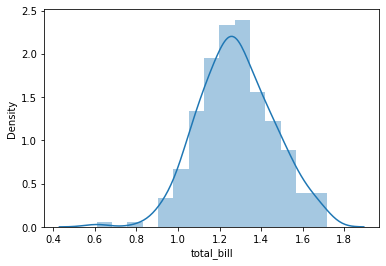

In [64]:
ax = sns.distplot(np.log10(1.+tips["total_bill"]), kde=True)

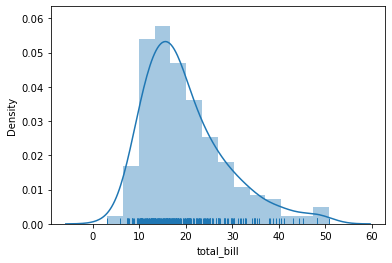

In [65]:
ax = sns.distplot(tips["total_bill"], rug=True)

In [66]:
data = np.array([0.2, 0.7, 1., 1.2, 3., 3.5, 4.2, 5., 5.4, 5.5])

In [67]:
def gaussian(x0, x, sigma=1.):
    z = np.exp(-(x-x0)**2/(2.*sigma**2))
    return z

In [68]:
def kde(data, x, sigma=1.):
    y = 0
    n = data.shape[0]
    for i in range(0, n):
        y = y + gaussian(data[i], x, sigma)
    y = y/n
    return y

In [69]:
xx = tips["total_bill"].values
#xx = data.copy()
print(xx) 

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.

In [70]:
x = np.linspace(-10,60,501)
#x = np.linspace(-10,10,201)
y = kde(xx, sigma=3., x=x)

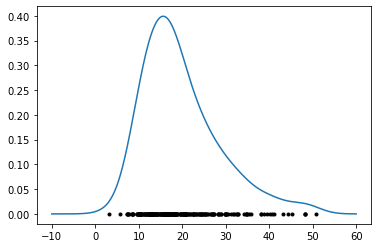

In [71]:
plt.figure()
plt.plot(x, y)
plt.plot(xx, np.zeros(xx.shape), 'k.')
plt.show()

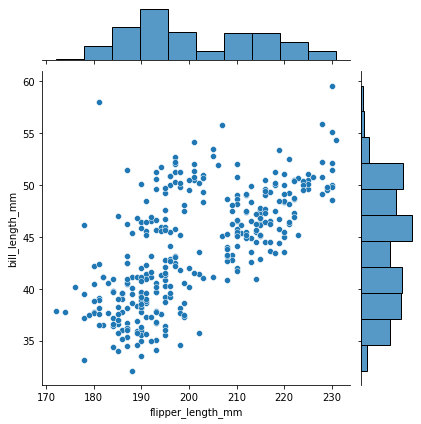

In [72]:
penguins = sns.load_dataset("penguins")

ax = sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm")

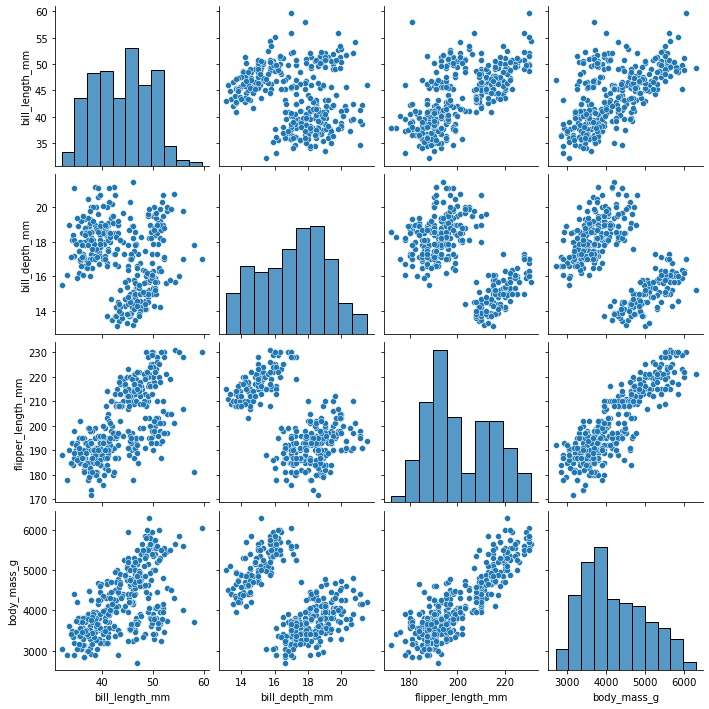

In [74]:
ax = sns.pairplot(data=penguins)

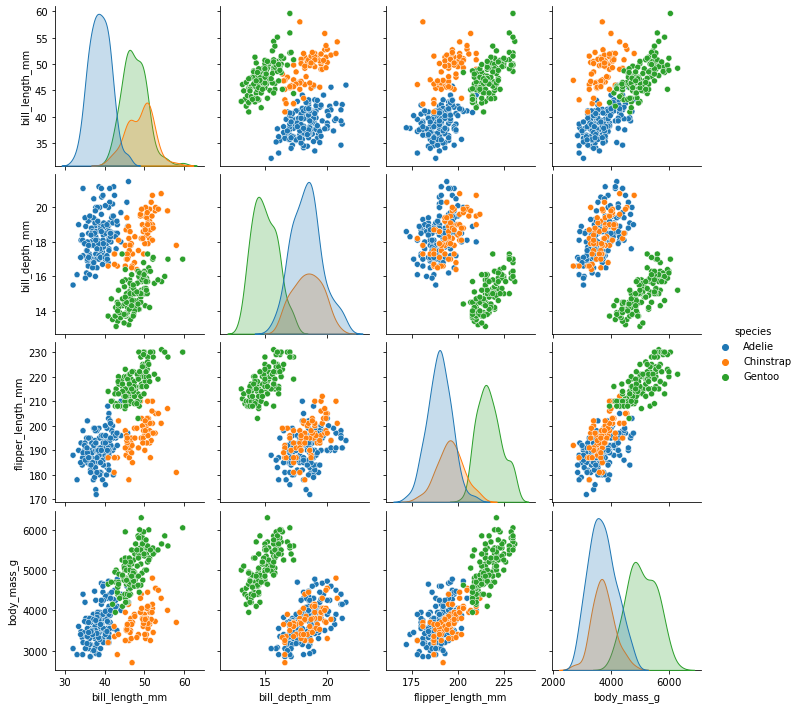

In [75]:
ax = sns.pairplot(data=penguins, hue="species")

TypeError: distplot() got an unexpected keyword argument 'element'

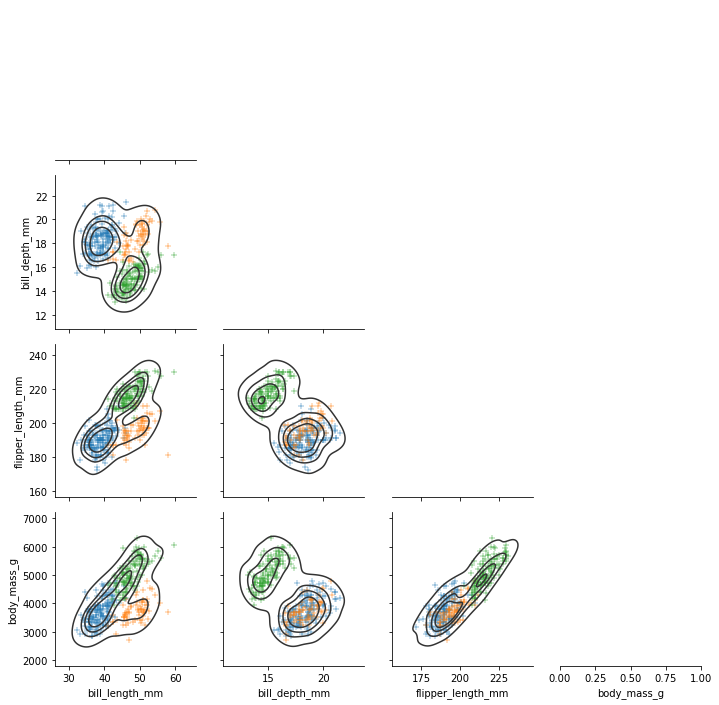

In [76]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.distplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
#g.legend.set_bbox_to_anchor((.61, .6))

#### FacetGrid

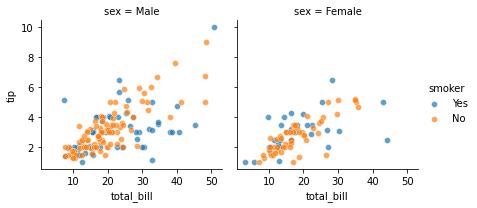

In [77]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()